In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

# to print plots inline
%matplotlib inline

In [2]:
beta = 0.95
sigma = 1.0
R = 1

In [3]:
'''
------------------------------------------------------------------------
Create Grid for State Space    
------------------------------------------------------------------------
lb_w      = scalar, lower bound of cake grid
ub_w      = scalar, upper bound of cake grid 
size_w    = integer, number of grid points in cake state space
w_grid    = vector, size_w x 1 vector of cake grid points 
------------------------------------------------------------------------
'''
lb_w = 0.4 
ub_w = 1.0 
size_w = 200  # Number of grid points
w_grid = np.linspace(lb_w, ub_w, size_w)

'''
------------------------------------------------------------------------
Create grid of current utility values    
------------------------------------------------------------------------
C        = matrix, current consumption (c=w-w')
U        = matrix, current period utility value for all possible
           choices of w and w' (rows are w, columns w')
------------------------------------------------------------------------
'''
C = np.zeros((size_w, size_w)) 
for i in range(size_w): # loop over w
    for j in range(size_w): # loop over w'
        C[i, j] = w_grid[i] - w_grid[j] / R # note that if w'>w, consumption negative
# replace 0 and negative consumption with a tiny value 
# This is a way to impose non-negativity on cons
C[C<=0] = 1e-15
if sigma == 1:
    U = np.log(C)
else:
    U = (C ** (1 - sigma)) / (1 - sigma)
U[C<0] = -9999999

In [4]:
'''
------------------------------------------------------------------------
Value Function Iteration    
------------------------------------------------------------------------
VFtol     = scalar, tolerance required for value function to converge
VFdist    = scalar, distance between last two value functions
VFmaxiter = integer, maximum number of iterations for value function
V         = vector, the value functions at each iteration
Vmat      = matrix, the value for each possible combination of w and w'
Vstore    = matrix, stores V at each iteration 
VFiter    = integer, current iteration number
TV        = vector, the value function after applying the Bellman operator
PF        = vector, indicies of choices of w' for all w 
VF        = vector, the "true" value function
------------------------------------------------------------------------
'''
VFtol = 1e-8 
VFdist = 7.0 
VFmaxiter = 3000 
V = np.zeros(size_w) # initial guess at value function
Vmat = np.zeros((size_w, size_w)) # initialize Vmat matrix
Vstore = np.zeros((size_w, VFmaxiter)) #initialize Vstore array
VFiter = 1 
while VFdist > VFtol and VFiter < VFmaxiter:  
    for i in range(size_w): # loop over w
        for j in range(size_w): # loop over w'
            Vmat[i, j] = U[i, j] + beta * V[j] 
      
    Vstore[:, VFiter] = V.reshape(size_w,) # store value function at each iteration for graphing later
    TV = Vmat.max(1) # apply max operator to Vmat (to get V(w))
    PF = np.argmax(Vmat, axis=1)
    VFdist = (np.absolute(V - TV)).max()  # check distance
    print('Interat')
    V = TV
    VFiter += 1 
    


if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')            


VF = V # solution to the functional equation

Value function converged after this many iterations: 398


In [5]:
'''
------------------------------------------------------------------------
Find consumption and savings policy functions   
------------------------------------------------------------------------
optW  = vector, the optimal choice of w' for each w
optC  = vector, the optimal choice of c for each c
------------------------------------------------------------------------
'''
optW = w_grid[PF] # tomorrow's optimal cake size (savings function)
optC = w_grid - optW # optimal consumption - get consumption through the transition eqn

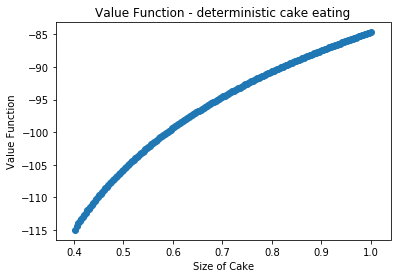

In [6]:
# Plot value function 
plt.figure()
# plt.plot(wvec, VF)
plt.scatter(w_grid[1:], VF[1:])
plt.xlabel('Size of Cake')
plt.ylabel('Value Function')
plt.title('Value Function - deterministic cake eating')
plt.show()

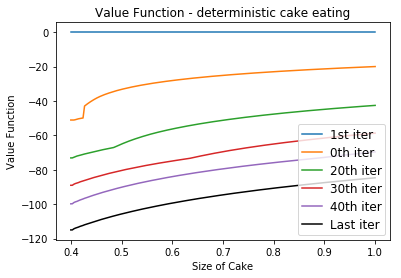

In [7]:
# Plot value function at several iterations
plt.figure()
fig, ax = plt.subplots()
ax.plot(w_grid, Vstore[:,0], label='1st iter')
ax.plot(w_grid, Vstore[:,10], label='0th iter')
ax.plot(w_grid, Vstore[:,20], label='20th iter')
ax.plot(w_grid, Vstore[:,30], label='30th iter')
ax.plot(w_grid, Vstore[:,40], label='40th iter')
ax.plot(w_grid, Vstore[:,VFiter-1], 'k', label='Last iter')
# Now add the legend with some customizations.
legend = ax.legend(loc='lower right', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Cake')
plt.ylabel('Value Function')
plt.title('Value Function - deterministic cake eating')
plt.show()